<a href="https://colab.research.google.com/github/hpsuresh12345/Python-code/blob/master/Timeseries_exponential_smoothing_24Aug2019.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
pip install pmdarima

In [0]:
import warnings
import numpy as np
import pandas as pd
import itertools
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
%matplotlib inline
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from matplotlib.pylab import rcParams
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
import pyramid as pm
from sklearn import metrics
warnings.filterwarnings('ignore')
import matplotlib.cm as cm

In [0]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity ='all'

In [11]:
data=sns.load_dataset("flights")
data.head()
data.tail()
data.shape
data.describe()
data.info()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


,year,month,passengers
139,1960,August,606
140,1960,September,508
141,1960,October,461
142,1960,November,390
143,1960,December,432


(144, 3)

,year,passengers
count,144.000000,144.000000
mean,1954.500000,280.298611
std,3.464102,119.966317
min,1949.000000,104.000000
25%,1951.750000,180.000000
50%,1954.500000,265.500000
75%,1957.250000,360.500000
max,1960.000000,622.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 3 columns):
year          144 non-null int64
month         144 non-null category
passengers    144 non-null int64
dtypes: category(1), int64(2)
memory usage: 2.9 KB


In [12]:
train,test = data[:132],data[132:]
train.shape
test.shape

(132, 3)

(12, 3)

<function matplotlib.pyplot.show>

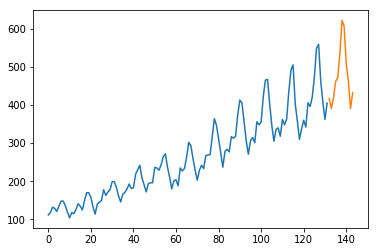

In [14]:
plt.plot(train.passengers)
plt.plot(test.passengers)
plt.show

In [0]:
model=ExponentialSmoothing(train.passengers,trend='add',seasonal='mul',seasonal_periods=12).fit()

In [17]:
ExponentialSmoothing

statsmodels.tsa.holtwinters.ExponentialSmoothing

In [18]:
model.params

{'damping_slope': nan,
 'initial_level': 225.81804357806502,
 'initial_seasons': array([0.51871446, 0.5409136 , 0.59214149, 0.56607664, 0.52397274,
        0.58345929, 0.64285097, 0.64082501, 0.58669635, 0.51036401,
        0.45068799, 0.52656335]),
 'initial_slope': 1.083614668909484,
 'lamda': None,
 'remove_bias': False,
 'smoothing_level': 0.3157894736842105,
 'smoothing_seasonal': 0.6842105263157894,
 'smoothing_slope': 0.05263132126763647,
 'use_boxcox': False}

In [0]:
predicted=model.predict(132,142)

In [25]:
predicted

132    416.880499
133    394.081804
134    463.146184
135    449.154364
136    473.079572
137    540.229247
138    627.202264
139    638.522300
140    524.253163
141    458.972684
142    403.736056
dtype: float64

<Figure size 1080x720 with 0 Axes>

IndexError: ignored

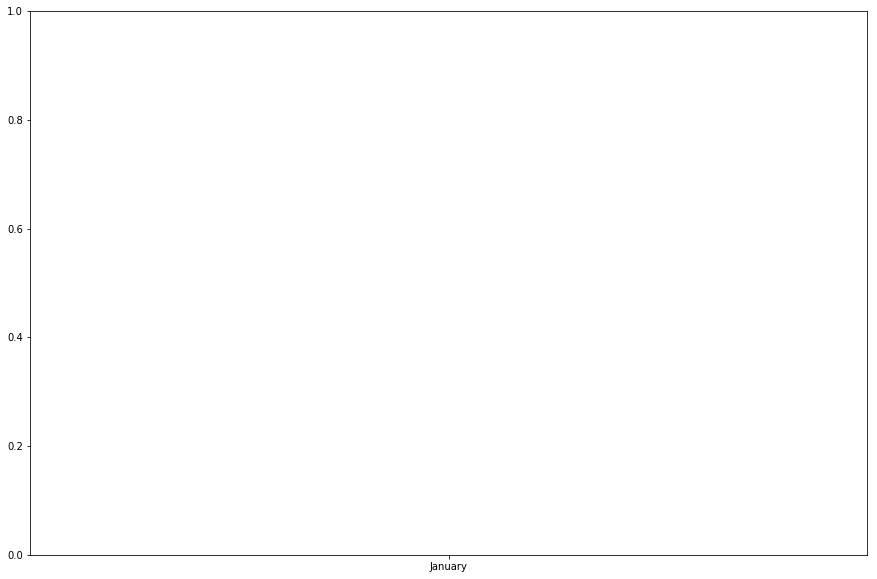

In [35]:
plt.figure(figsize=(15,10))
plt.plot(train.month, train.passengers,label='Train')
plt.plot(test.month,test.passengers,label='Test')
plt.plot(test.month,predicted, label='Holt-Winters')
plt.legend(loc='best')
plt.show()

In [0]:
metrics.mean_squared_error(test.passengers,test.Predicted_Passengers)

1220.5462974520162

In [0]:
metrics.median_absolute_error(test.passengers,test.Predicted_Passengers)

28.25791340117226